#Import Libraries & Read Files

In [1]:
# Import Libaries
from google.colab import files
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Read the File
drive.mount('/content/gdrive',force_remount=True)
path_to_datafile = '/content/gdrive/MyDrive/UCM LLNL Data Science Challenge Program/data/mpro_exp_data2_rdkit_feat.csv'
df = pd.read_csv(path_to_datafile, sep = ',')


Mounted at /content/gdrive


# Data Preprocessing

In [2]:
# Data Cleaning
df = df.replace([np.inf , -np.inf],np.nan)
df = df.fillna(0)

# Input & Output Data Extraction
df.rename({"Unnamed: 0":"No Name"}, axis="columns", inplace=True)
x_train = df[df["subset"] == "train"].drop(columns = ["No Name" , "lib_name" , "smiles" , "cmpd_id"])
y_train = x_train["label"]
x_train = x_train.drop(columns = ["label" , "subset"])

x_test = df[df["subset"] == "test"].drop(columns = ["No Name" , "lib_name" , "smiles" , "cmpd_id"])
y_test = df[df["subset"] == "test"].loc[:,"label"]
x_test = x_test.drop(columns = ["label" , "subset"])

# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

Observation: The data set with the columns that has correlation >= 90% removed has worse accuracy for some machine learning models

# ML Model 1: KNN



In [ ]:
# ML Model: K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
print('n_neighbors = %1d accuracy = %1.7f \n'% (5 , accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Hyperparameter Tuning
# for i in range (1,20):
#   knn = KNeighborsClassifier(n_neighbors = i)
#   knn.fit(x_train_scaled, y_train)
#   y_pred = knn.predict(x_test_scaled)
#   print('n_neighbors = %1d accuracy = %1.7f'% (i , accuracy_score(y_test, y_pred)))

n_neighbors = 5 accuracy = 0.6875000 

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        60
           1       0.69      0.75      0.72        68

    accuracy                           0.69       128
   macro avg       0.69      0.68      0.68       128
weighted avg       0.69      0.69      0.69       128



Accuracy: 68.75%

# ML Model 2: SVC

## SVC with Linear Kernel


In [ ]:
# ML Model: Support Vector Machine
from sklearn.svm import SVC
# Linear Kernel
svc = SVC(kernel = 'linear')
svc.fit(x_train_scaled, y_train)
y_pred = svc.predict(x_test_scaled)
print('Linear SVC accuracy = %1.7f \n'% accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


Linear SVC accuracy = 0.7187500 

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        60
           1       0.73      0.75      0.74        68

    accuracy                           0.72       128
   macro avg       0.72      0.72      0.72       128
weighted avg       0.72      0.72      0.72       128



Accuracy: 71.88%

## SVC with Polynomial Kernel


In [ ]:
from sklearn.svm import SVC
# Polynomial Kernel
svc = SVC(kernel = 'poly', degree = 2)
svc.fit(x_train_scaled,y_train)
y_pred = svc.predict(x_test_scaled)
print('Poly SVC accuracy = %1.7f \n'% accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

# Hyperparameter Tuning
for i in range (1,6):
  svc = SVC(kernel = 'poly',degree = i)
  svc.fit(x_train_scaled,y_train)
  y_pred = svc.predict(x_test_scaled)
  print('%1d Order Poly SVC accuracy = %1.7f \n'% (i , accuracy_score(y_test, y_pred)))


Poly SVC accuracy = 0.7187500 

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        60
           1       0.72      0.76      0.74        68

    accuracy                           0.72       128
   macro avg       0.72      0.72      0.72       128
weighted avg       0.72      0.72      0.72       128

1 Order Poly SVC accuracy = 0.6796875 

2 Order Poly SVC accuracy = 0.7187500 

3 Order Poly SVC accuracy = 0.6875000 

4 Order Poly SVC accuracy = 0.6328125 

5 Order Poly SVC accuracy = 0.5781250 



Accuracy: 71.88%

* Interesting Observation: Linear SVC yields higher accuracy
compares to Polynomial SVC with first order

## SVC with RBF Kernel

In [ ]:
from sklearn.svm import SVC
# Polynomial Kernel
svc = SVC(kernel = 'rbf')
svc.fit(x_train_scaled,y_train)
y_pred = svc.predict(x_test_scaled)
print('RBF SVC accuracy = %1.7f \n'% accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


RBF SVC accuracy = 0.7656250 

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        60
           1       0.82      0.72      0.77        68

    accuracy                           0.77       128
   macro avg       0.77      0.77      0.77       128
weighted avg       0.77      0.77      0.77       128



Accuracy = 76.56%

## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
# Dual = True
avg_acc = 0
lin_svc = LinearSVC()
for i in range(0,10):
  lin_svc.fit(x_train_scaled,y_train)
  y_pred = lin_svc.predict(x_test_scaled)
  avg_acc = avg_acc + accuracy_score(y_test,y_pred)
print('Linear SVC accuracy = %1.7f \n'% (avg_acc/10))
print(classification_report(y_test,y_pred))

# Dual = False
lin_svc = LinearSVC(dual = False)
lin_svc.fit(x_train_scaled,y_train)
y_pred = lin_svc.predict(x_test_scaled)
print('Linear SVC accuracy = %1.7f \n'% accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Linear SVC accuracy = 0.7125000 

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        60
           1       0.73      0.75      0.74        68

    accuracy                           0.72       128
   macro avg       0.72      0.72      0.72       128
weighted avg       0.72      0.72      0.72       128

Linear SVC accuracy = 0.7109375 

              precision    recall  f1-score   support

           0       0.70      0.67      0.68        60
           1       0.72      0.75      0.73        68

    accuracy                           0.71       128
   macro avg       0.71      0.71      0.71       128
weighted avg       0.71      0.71      0.71       128



1. (dual = True)  Accuracy = 71.17%
2. (dual = False) Accuracy = 71.09%

* When dual = True, the algorithm fails to converge!

# ML Model 3: Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Trees with Hyperparameter Tuning
avg_acc = 0
parameters = {'max_depth':[15, 18]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(estimator = dt, param_grid = parameters)
for i in range (0,10):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.best_params_)
  avg_acc = avg_acc + accuracy_score(y_test, y_pred)
print('Decision Trees Accuracy = %1.7f\n' % (avg_acc/10))

{'max_depth': 15}
{'max_depth': 18}
{'max_depth': 18}
{'max_depth': 18}
{'max_depth': 15}
{'max_depth': 18}
{'max_depth': 15}
{'max_depth': 15}
{'max_depth': 18}
{'max_depth': 15}
Decision Trees Accuracy = 0.7328125



Accuracy = 73.28%

# ML Model 4: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest with Hyperparameter Tuning
avg_acc = 0
parameters = {'n_estimators':[100, 125, 150, 200]}
rfc = RandomForestClassifier()
clf = GridSearchCV(estimator = rfc, param_grid = parameters)
for i in range (0,10):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.best_params_)
  avg_acc = avg_acc + accuracy_score(y_test, y_pred)
print('Decision Trees Accuracy = %1.7f\n' % (avg_acc/10))
print(classification_report(y_test, y_pred))

{'n_estimators': 125}
{'n_estimators': 200}
{'n_estimators': 100}
{'n_estimators': 200}
{'n_estimators': 100}
{'n_estimators': 100}
{'n_estimators': 125}
{'n_estimators': 150}
{'n_estimators': 125}
{'n_estimators': 200}
Decision Trees Accuracy = 0.7632813

              precision    recall  f1-score   support

           0       0.67      0.95      0.79        60
           1       0.93      0.59      0.72        68

    accuracy                           0.76       128
   macro avg       0.80      0.77      0.75       128
weighted avg       0.81      0.76      0.75       128



Accuracy = 76.33%

# ML Model 5: ExtraTree

In [ ]:
# ML Model: Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=1)
etc.fit(x_train_scaled, y_train)
etc.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.734375
              precision    recall  f1-score   support

           0       0.70      0.75      0.73        60
           1       0.77      0.72      0.74        68

    accuracy                           0.73       128
   macro avg       0.73      0.74      0.73       128
weighted avg       0.74      0.73      0.73       128



Accuracy = 73.43%

# ML Model 6: AdaBoost

In [ ]:
# ML Model: Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train_scaled, y_train)
ada.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.734375
              precision    recall  f1-score   support

           0       0.70      0.75      0.73        60
           1       0.77      0.72      0.74        68

    accuracy                           0.73       128
   macro avg       0.73      0.74      0.73       128
weighted avg       0.74      0.73      0.73       128



Accuracy = 73.44%

# ML Model 7: XGBoost

In [ ]:
# ML Model: Extreme Gradient Boosting

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 400)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print('XGBoost Accuracy = %1.7f\n' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Hyperparameter Tuning
# for i in range (100,1000,100):
#   xgb = XGBClassifier(n_estimators = i)
#   xgb.fit(x_train, y_train)
#   y_pred = xgb.predict(x_test)
#   print('XGBoost Estimator = %1d  Accuracy = %1.7f\n' % (i , accuracy_score(y_test, y_pred)))

XGBoost Accuracy = 0.7890625

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        60
           1       0.90      0.68      0.77        68

    accuracy                           0.79       128
   macro avg       0.81      0.80      0.79       128
weighted avg       0.81      0.79      0.79       128



Accuracy = 78.91%

# ML Model 8: SGD


In [ ]:
# ML Model: Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

avg_acc = 0
sgd = SGDClassifier()
for i in range (0,20):
  sgd.fit(x_train_scaled, y_train)
  y_pred = sgd.predict(x_test_scaled)
  avg_acc = avg_acc + accuracy_score(y_test, y_pred)
print('SGD Accuracy = %1.7f\n' % (avg_acc/20))
print(classification_report(y_test,y_pred))

SGD Accuracy = 0.7195312

              precision    recall  f1-score   support

           0       0.72      0.73      0.73        60
           1       0.76      0.75      0.76        68

    accuracy                           0.74       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.74      0.74      0.74       128



Accuracy = 72.03%

# ML Model 9: PAC

In [ ]:
# ML Model: Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

avg_acc = 0
for i in range(0,50):
  pac = PassiveAggressiveClassifier(warm_start = True, average = True)
  pac.fit(x_train_scaled, y_train)  
  y_pred = pac.predict(x_test_scaled)
  avg_acc = avg_acc + accuracy_score(y_test, y_pred)
print('PAC Accuracy = %1.7f\n' % (avg_acc/50))
print(classification_report(y_test, y_pred))

PAC Accuracy = 0.7226562

              precision    recall  f1-score   support

           0       0.70      0.75      0.73        60
           1       0.77      0.72      0.74        68

    accuracy                           0.73       128
   macro avg       0.73      0.74      0.73       128
weighted avg       0.74      0.73      0.73       128



Accuracy = 72.27%

# ML Model 10: LogRegression



In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver = 'sag',max_iter = 260)
log.fit(x_train_scaled, y_train)
y_pred = log.predict(x_test_scaled)
print('Logistic Reg Accuracy = %1.7f\n' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# # Hyperparameter Tuning for 'solver' & 'max_iter'
# for i in range(260,270):
#   log = LogisticRegression(solver = 'sag',max_iter = i)
#   log.fit(x_train_scaled, y_train)
#   y_pred = log.predict(x_test_scaled)
#   print('Logistic Reg at iter = %1d Accuracy = %1.7f\n' % (i , accuracy_score(y_test, y_pred)))

Logistic Reg Accuracy = 0.7656250

              precision    recall  f1-score   support

           0       0.73      0.78      0.76        60
           1       0.80      0.75      0.77        68

    accuracy                           0.77       128
   macro avg       0.77      0.77      0.77       128
weighted avg       0.77      0.77      0.77       128



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Accuracy = 76.56%

# ML Model 11: Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(x_train_scaled, y_train)
y_pred = p.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7421875
              precision    recall  f1-score   support

           0       0.72      0.73      0.73        60
           1       0.76      0.75      0.76        68

    accuracy                           0.74       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.74      0.74      0.74       128



Accuracy = 74.22%

# Summary of ML Models' Performance

In [ ]:
Perform = [68.75, 76.56, 73.28, 76.33, 73.43, 73.43, 78.91, 72.03, 72.27, 76.56, 74.22]
Perform = sorted(Perform, key = float)
print(Perform[-1])
print(Perform[-2])
print(Perform[-3])
print(Perform[-4])
print(Perform[-5])

78.91
76.56
76.56
76.33
74.22


1. 68.75%
2. 76.56%
3. 73.28%
4. 76.33%
5. 73.43%
6. 73.43%
7. 78.91%
8. 72.03%
9. 72.27%
10. 76.56%
11. 74.22%

* 1st place: XGBoost
* 2nd place: SVC with RBF Kernel
* 3rd place: LogRegression
* 4th place: Random Forest
* 5th place: Perceptron

# ANN Model: MLP1 (Scikit-Learn)

In [26]:
# Artificial Neural Network: Mutilayer Perceptron
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(hidden_layer_sizes =(50), activation = 'relu', solver = 'adam',\
#                     batch_size = 32, learning_rate = 'adaptive' , max_iter = 100,\
#                     tol = 1e-4, verbose = True, warm_start= True)
# mlp.fit(x_train_scaled, y_train)
# y_pred = mlp.predict(x_test_scaled)
# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# Correlation Finding Code
avg_acc = 0
for i in range(0,10):
  mlp = MLPClassifier(hidden_layer_sizes =(200), activation = 'relu', solver = 'adam',\
                    batch_size = 'auto', learning_rate = 'invscaling' , max_iter = 1000,\
                    tol = 1e-4, verbose = False, warm_start= True)
  mlp.fit(x_train_scaled, y_train)
  y_pred = mlp.predict(x_test_scaled)
  avg_acc = avg_acc + accuracy_score(y_test, y_pred)

print(avg_acc/10)


0.7859375


Highest Accuracy = 81.25%

---
* batch_size = 1, accuracy = 76.16% , Time = 40 mins
* batch_size = 2, accuracy = 76.75% , Time = 16 mins
* batch_size = 4, accuracy = 76.53% , Time = 10 mins
* batch_size = 8, accuracy = 77.69% , Time = 7 mins
* batch_size = 16, accuracy = 77.78% , Time = 5 mins
* batch_size = 32, accuracy = 77.75% , Time = 4 mins
* batch_size = 64, accuracy = 77.59% , Time = 3 mins
* batch_size = 128, accuracy = 77.22% , Time = 2 mins
* batch_size = 256, accuracy = 77.38% , Time = 2 mins
* batch_size = 512, accuracy = 77.66% , Time = 2 mins
* batch_size = 1024, accuracy = 77.47%, Time = 2 mins
* batch_size = auto, accuracy = 77.38%, Time = 2 mins
--- 
* learning_rate = constant, accuracy = 77.22%
* learning_rate = adaptive, accuracy = 77.69%
* learning_rate = invscaling, accuracy = 77.91%
---
Assumption: node per layer = 50
* hidden_layer = 1, accuracy = 77.58%, Time = 3.3s
* hidden_layer = 2, accuracy = 76.80%, Time = 2.7s
* hidden_layer = 3, accuracy = 76.17%, Time = 2.3s
* hidden_layer = 4, accuracy = 76.48%, Time = 2.3s
* hidden_layer = 5, accuracy = 74.38%, Time = 2.3s
--- 
Assumption: layer = 1
* node per layer = 25, accuracy = 76.06%, Time = 3 sec
* node per layer = 50, accuracy = 77.44%, Time = 8 sec
* node per layer = 75, accuracy = 77.75%, Time = 13 sec
* node per layer = 100, accuracy = 77.22%, Time = 15 sec
* node per layer = 200, accuracy = 78.53%, Time = 21 sec
* node per layer = 500, accuracy = 78.28%, Time = 25 sec
---
* Scaling of Data: Yes, accuracy = 78.91%
* Scaling of Data: No,  accuracy = 47.88%
---
Observations:
1. Smaller batch size is related to needing more runtime to fit the model
2. Smaller batch size is related to needing less iterations to fit the model.
3. Smaller batch size is related to faster learning rate
4. Smaller batch size leads to slower convergence and more noises.
5. The network is very sensitive to the scaling of input data. Without the scaling of the dataset, the model will underfit.

# Visualization of MLP1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


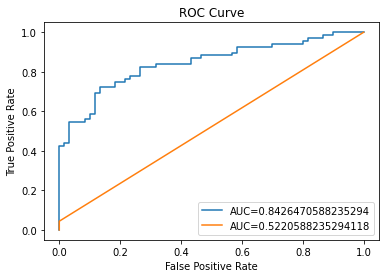

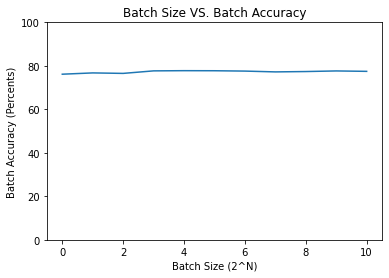

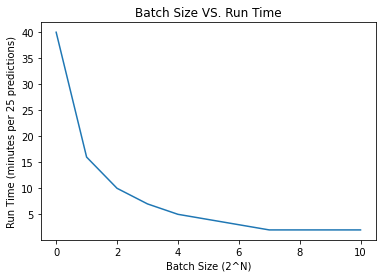

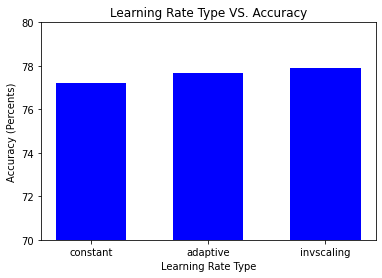

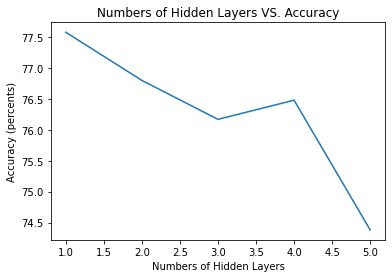

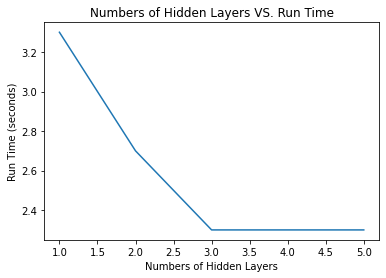

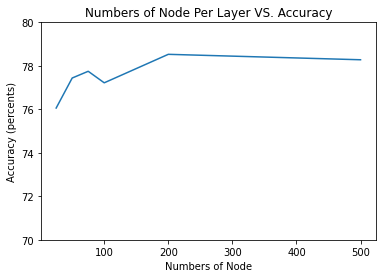

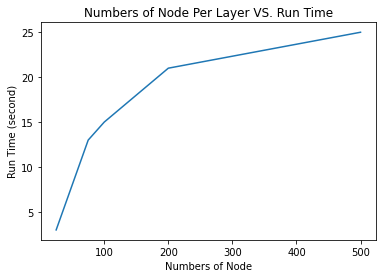

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

# AUC_ROC curve for scaled $ unscaled data
fpr, tpr, _ = roc_curve(y_test, mlp.predict_proba(x_test_scaled)[:,1])
fpr2, tpr2, _ = roc_curve(y_test, mlp.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test, mlp.predict_proba(x_test_scaled)[:,1])
auc2 = roc_auc_score(y_test, mlp.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.plot(fpr2, tpr2, label = "AUC=" + str(auc2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

# batch_sizes VS. accuracy
batch_sz = list()
for i in range(0,11):
  batch_sz.append(i)
batch_acc = [76.16, 76.75, 76.53, 77.69, 77.78, 77.75, 77.59, 77.22, 77.38, 77.66, 77.47]
plt.plot(batch_sz, batch_acc)
plt.title('Batch Size VS. Batch Accuracy')
plt.xlabel('Batch Size (2^N)')
plt.ylabel('Batch Accuracy (Percents)')
plt.ylim(top = 100)
plt.ylim(bottom = 0)
plt.show()

# batch_sizes VS. Run time
batch_sz = list()
for i in range(0,11):
  batch_sz.append(i)
batch_time = [40, 16, 10, 7, 5, 4, 3, 2, 2, 2, 2]
plt.plot(batch_sz, batch_time)
plt.title('Batch Size VS. Run Time')
plt.xlabel('Batch Size (2^N)')
plt.ylabel('Run Time (minutes per 25 predictions)')
plt.show()

# learning_rate types VS. accuracy
learn_rate = {'constant' : 77.22 , 'adaptive' : 77.69 , 'invscaling' : 77.91}
plt.bar(list(learn_rate.keys()) , list(learn_rate.values()) , color = 'b' , width = 0.6)
plt.title('Learning Rate Type VS. Accuracy')
plt.xlabel('Learning Rate Type')
plt.ylabel('Accuracy (Percents)')
plt.ylim(top = 80)
plt.ylim(bottom = 70)
plt.show()

# hidden layers VS. accuracy
layer = [1, 2, 3, 4, 5]
layer_accuracy = [77.58, 76.80, 76.17, 76.48, 74.38]
plt.plot(layer, layer_accuracy)
plt.title('Numbers of Hidden Layers VS. Accuracy')
plt.xlabel('Numbers of Hidden Layers')
plt.ylabel('Accuracy (percents)')
plt.show()

# hidden layers VS. run time
layer = [1, 2, 3, 4, 5]
layer_time = [3.3, 2.7, 2.3, 2.3, 2.3]
plt.plot(layer, layer_time)
plt.title('Numbers of Hidden Layers VS. Run Time')
plt.xlabel('Numbers of Hidden Layers')
plt.ylabel('Run Time (seconds)')
plt.show()

# nodes VS. accuray
node = [25, 50, 75, 100, 200, 500]
node_accuracy = [76.06, 77.44, 77.75, 77.22, 78.53, 78.28]
plt.plot(node, node_accuracy)
plt.title('Numbers of Node Per Layer VS. Accuracy')
plt.xlabel('Numbers of Node')
plt.ylabel('Accuracy (percents)')
plt.ylim(top = 80)
plt.ylim(bottom = 70)
plt.show()

# nodes VS. run time
node = [25, 50, 75, 100, 200, 500]
node_time = [3, 8, 13, 15, 21, 25]
plt.plot(node, node_time)
plt.title('Numbers of Node Per Layer VS. Run Time')
plt.xlabel('Numbers of Node')
plt.ylabel('Run Time (second)')
plt.show()

# ANN Model: MLP2 (Keras/Tensorflow)

In [22]:
from keras.models import Sequential
from keras.layers import Dense

def MLP(trainX, trainY, testX, testY, n_batchs, n_epochs, n_nodes, n_layers, validation, verb):
  # # Set up model
  model = Sequential()
  # Construct Layers
  model.add(Dense(50 , input_shape = (trainX.shape[1],) , activation = 'relu'))
  for i in range(0,n_layers):
    model.add(Dense(n_nodes , activation = 'relu'))
  model.add(Dense(1 , activation = 'sigmoid'))
  # Compile Function
  model.compile(loss = 'BinaryCrossentropy' , optimizer = 'Adam' , metrics = ["accuracy" , "AUC"])
  # Fit the model
  history = model.fit(trainX , trainY , batch_size=n_batchs , epochs=n_epochs , verbose=verb , validation_split=validation)
  # Model Prediction
  predY = (model.predict(testX) > 0.5).astype("int32").ravel()
  # Output Performance
  print(accuracy_score(testY, predY))
  print(classification_report(testY, predY))
  # Return Values
  return history

* Highest Accuracy = 82.03%
* Average Accuracy = 79.06%
---
* Accuracy with scaled data = 78.13%
* Accuracy with unscaled data = 47.66%
---
* Scikit-learn MLP Highest Accuracy = 81.25%
* Tensorflow/Keras MLP Highest Accuracy = 82.03%
---
Observation:
* The neural network is super sensitive to the scaling of the data, lack of the scaling of the data will cause underfitting of the model.

* Too many layers will cause bad accuracy. i.e. 100 layers


# Visualization of MLP2

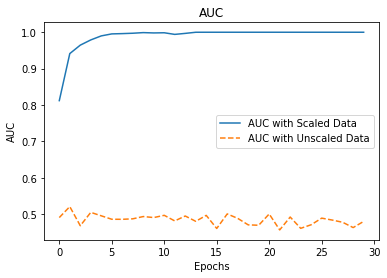

In [30]:
# prepare history data
history = MLP(x_train_scaled, y_train, x_test_scaled, y_test, 32, 30, 100, 10, 0.2, 1)
history2 = MLP(x_train, y_train, x_test, y_test, 32, 30, 100, 10, 0.2, 1)

# epochs VS. accuracy
plt.plot(history.history['accuracy'], label = "Accuracy with Scaled Data", linestyle = 'solid')
plt.plot(history2.history['accuracy'], label = "Accuracy with Unscaled Data", linestyle = 'dashed')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(loc = 'best')
plt.show()

# epoches VS. loss with both scaled and unscaled data (Overview)
plt.plot(history.history['loss'], label = "Loss with Scaled Data", linestyle = 'solid')
plt.plot(history2.history['loss'], label = "Loss with Unscaled Data", linestyle = 'solid')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

# epoches VS. loss with both scaled and unscaled data (Zoom-in view)
plt.plot(history.history['loss'], label = "Loss with Scaled Data", linestyle = 'solid')
plt.plot(history2.history['loss'], label = "Loss with Unscaled Data", linestyle = 'solid')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(top = 1000000)
plt.ylim(bottom = 0.0)
plt.legend(loc = 'best')
plt.show()

# epoches VS. loss with scaled data only
plt.plot(history.history['loss'], label = "Loss with Scaled Data", linestyle = 'solid')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

# epoches VS. loss with scaled data only (Zoom in view)
plt.plot(history.history['loss'], label = "Loss with Scaled Data", linestyle = 'solid')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(top = 0.05)
plt.ylim(bottom = 0.0)
plt.legend(loc = 'best')
plt.show()

# auc curve
plt.plot(history.history['auc'], label = "AUC with Scaled Data", linestyle = 'solid')
plt.plot(history2.history['auc'], label = "AUC with Unscaled Data", linestyle = 'dashed')
plt.title('AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend(loc = 'best')
plt.show()

# batch VS. Accuracy
batch_size = [1, 32, 512, len(x_train_scaled)]
for i in range(len(batch_size)):
  history = MLP(x_train_scaled, y_train, x_test_scaled, y_test, batch_size[i], 30, 100, 10, 0.2, 0)
  plt.plot(history.history['accuracy'], label = "Batch Size = " + str(batch_size[i]), linestyle = 'solid')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy (%)')
  plt.legend(loc = 4)
plt.show()

# roc curve
  # import library
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
  # Train Scikit-learn Model
mlp = MLPClassifier(hidden_layer_sizes =(50), activation = 'relu', solver = 'adam',\
                    batch_size = 32, learning_rate = 'adaptive' , max_iter = 100, tol = 1e-4, verbose = False, warm_start= True)
mlp.fit(x_train_scaled, y_train)

  # Train Tensorflow Model
model = Sequential()
model.add(Dense(50 , input_shape = (x_train_scaled.shape[1],) , activation = 'relu'))
for i in range(0,10):
  model.add(Dense(100 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))
model.compile(loss = 'BinaryCrossentropy' , optimizer = 'Adam' , metrics = ["accuracy" , "AUC"])
history = model.fit(x_train_scaled , y_train , batch_size=32 , epochs=30 , verbose=0 , validation_split=0.2)
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32").ravel()

  # Calculate Roc Data
fpr, tpr, _ = roc_curve(y_test, mlp.predict_proba(x_test_scaled)[:,1])
fpr2, tpr2, _ = roc_curve(y_test,y_pred)

  # Calculate Auc Data
auc = roc_auc_score(y_test, mlp.predict_proba(x_test_scaled)[:,1])
auc2 = roc_auc_score(y_test, y_pred)

  # Plot ROC curve
plt.plot(fpr, tpr, label = 'Scikit-Learn MLP auc = ' + str(auc))
plt.plot(fpr2, tpr2, label = 'Tensorflow MLP auc = ' + str(auc2))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()